In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

121

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,Price_Per_Sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,price_per_sqft,noOfFloor,property_id
0,house,independent house sector 45,sector 40,9.0,NaN,2367.0,Plot area 2367(219.9 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),12,12,3,servant room,NaN,North-West,0 to 1 Year Old,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['3 Wardrobe', '8 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",38022.0,4.0,E69310182


In [7]:
df.sample(5)[['price','area','areaWithType']]####areaWithType

,price,area,areaWithType
540,1.78,1424.0,Carpet area: 1424 (132.29 sq.m.)
599,1.45,1480.0,Built Up area: 1480 (137.5 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.)
162,1.01,1750.0,Super Built up area 1750(162.58 sq.m.)Built Up area: 1475 sq.ft. (137.03 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.)
546,1.55,1995.0,Super Built up area 1995(185.34 sq.m.)
2540,2.29,1650.0,Carpet area: 1650 (153.29 sq.m.)


In [8]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [10]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [11]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [12]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1080,0.3,flat,72.0,Carpet area: 72 (6.69 sq.m.),NaN,NaN,72.0
530,3.1,flat,2491.0,Super Built up area 2491(231.42 sq.m.)Built Up area: 2450 sq.ft. (227.61 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),2491.0,2450.0,2250.0
818,0.6,flat,900.0,Super Built up area 900(83.61 sq.m.),900.0,NaN,NaN
1614,2.8,flat,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet area: 1880 sq.ft. (174.66 sq.m.),2047.0,NaN,1880.0
3388,1.6,flat,1669.0,Super Built up area 1565(145.39 sq.m.),1565.0,NaN,NaN


In [13]:
df.duplicated().sum()

121

In [14]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [15]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,9.00,house,2367.0,Plot area 2367(219.9 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),NaN,9000.0,6000.0
7,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,NaN,NaN
15,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
18,5.46,house,2259.0,Plot area 251(209.87 sq.m.),NaN,NaN,NaN
23,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,NaN,NaN


In [16]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
Price_Per_Sqrt          861
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                862
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
price_per_sqft         2960
noOfFloor              2960
property_id            2943
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [17]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [18]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,NaN,NaN
15,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
18,5.46,house,2259.0,Plot area 251(209.87 sq.m.),NaN,NaN,NaN
23,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,NaN,NaN
34,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN


In [19]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [20]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [21]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [22]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,1440.00,NaN
15,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
18,5.46,house,2259.0,Plot area 251(209.87 sq.m.),NaN,251.00,NaN
23,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,7000.00,NaN
34,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
38,6.75,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
53,6.75,house,3420.0,Plot area 380(317.73 sq.m.),NaN,380.00,NaN
59,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,50.00,NaN
75,1.00,house,126.0,Plot area 126(11.71 sq.m.),NaN,126.00,NaN
79,1.95,house,920.0,Plot area 920(85.47 sq.m.),NaN,920.00,NaN


In [23]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [24]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [25]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,1440.00,NaN
15,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
18,5.46,house,2259.0,Plot area 251(209.87 sq.m.),NaN,2259.00,NaN
23,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,7000.00,NaN
34,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
38,6.75,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
53,6.75,house,3420.0,Plot area 380(317.73 sq.m.),NaN,3420.00,NaN
59,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,50.00,NaN
75,1.00,house,126.0,Plot area 126(11.71 sq.m.),NaN,126.00,NaN
79,1.95,house,920.0,Plot area 920(85.47 sq.m.),NaN,920.00,NaN


In [26]:
# update the original dataframe
df.update(all_nan_df)

In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
Price_Per_Sqrt          861
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                862
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
price_per_sqft         2960
noOfFloor              2960
property_id            2943
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [28]:
df.head()

,property_type,society,sector,price,Price_Per_Sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,price_per_sqft,noOfFloor,property_id,super_built_up_area,built_up_area,carpet_area
0,house,independent house sector 45,sector 40,9.00,NaN,2367.0,Plot area 2367(219.9 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),12,12,3,servant room,NaN,North-West,0 to 1 Year Old,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['3 Wardrobe', '8 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",38022.0,4.0,E69310182,NaN,9000.0,6000.0
1,flat,m3m heights,sector 65,1.90,15000.0,1267.0,Super Built up area 1261(117.15 sq.m.),2,2,3,not available,4.0,NaN,By 2024,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",NaN,NaN,NaN,1261.0,NaN,NaN
2,flat,dlf the ultima,sector 81,2.50,11726.0,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),3,3,2,servant room,20.0,West,1 to 5 Year Old,"['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['1 Fridge', '7 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '10 Light', '1 Curtains', '3 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy R

In [29]:
df['additionalRoom'].value_counts()##additionalRoom

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [30]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [31]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1388,servant room,0,1,0,0,0
109,not available,0,0,0,0,0
2620,not available,0,0,0,0,0
2668,not available,0,0,0,0,0
3702,"servant room,store room",0,1,1,0,0


In [32]:
df['agePossession'].value_counts()##agePossession

1 to 5 Year Old        1676
5 to 10 Year Old        575
0 to 1 Year Old         530
undefined               332
10+ Year Old            310
Under Construction       90
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-10-01 00:00:00       8
2024-01-01 00:00:00       8
2024-06-01 00:00:00       7
2023-08-01 00:00:00       7
2025-12-01 00:00:00       7
2023-11-01 00:00:00       5
2024-08-01 00:00:00       4
2023-09-01 00:00:00       4
2024-07-01 00:00:00       4
By 2025                   4
2023-10-01 00:00:00       4
2024-05-01 00:00:00       3
2025-01-01 00:00:00       3
2024-11-01 00:00:00       3
2024-02-01 00:00:00       3
By 2027                   2
2027-07-01 00:00:00       2
2025-07-01 00:00:00       2
2026-04-01 00:00:00       2
2025-03-01 00:00:00       2
2026-12-01 00:00:00       2
2025-08-01 00:00:00       2
2025-09-01 00:00:00 

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              484
Old Property           310
Under Construction     132
Name: agePossession, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,Price_Per_Sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,price_per_sqft,noOfFloor,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent house sector 45,sector 40,9.00,NaN,2367.0,Plot area 2367(219.9 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),12,12,3,servant room,NaN,North-West,New Property,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['3 Wardrobe', '8 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",38022.0,4.0,E69310182,NaN,9000.0,6000.0,0,1,0,0,0
1,flat,m3m heights,sector 65,1.90,15000.0,1267.0,Super Built up area 1261(117.15 sq.m.),2,2,3,not available,4.0,NaN,Under Construction,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",NaN,NaN,NaN,1261.0,NaN,NaN,0,0,0,0,0
2,flat,dlf the ultima,sector 81,2.50,11726.0,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),3,3,2,servant room,20.0,West,Relatively New,"['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['1 Fridge', '7 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '10 Light', '1 Curtains', '3 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor P

In [37]:
df.sample(5)[['furnishDetails','features']]##furnishDetails

,furnishDetails,features
3508,"['1 Wardrobe', '3 Fan', '3 Light', '2 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"
655,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']"
1616,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '12 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3579,"['3 Wardrobe', '15 Fan', '1 Exhaust Fan', '5 Geyser', '22 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2696,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '1 Stove', '10 Light', '1 Chimney', '1 Modular Kitchen', '6 AC', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [39]:
furnishings_df.shape

(3803, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8476\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,Modular Kitchen,Fan,Stove,Sofa,Chimney,Microwave,Water Purifier,Light,Washing Machine,Bed,AC,TV,Geyser,Exhaust Fan,Wardrobe,Dining Table,Curtains,Fridge
3116,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1022,1,12,0,0,2,0,0,19,0,0,10,0,7,1,7,0,8,0
1357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

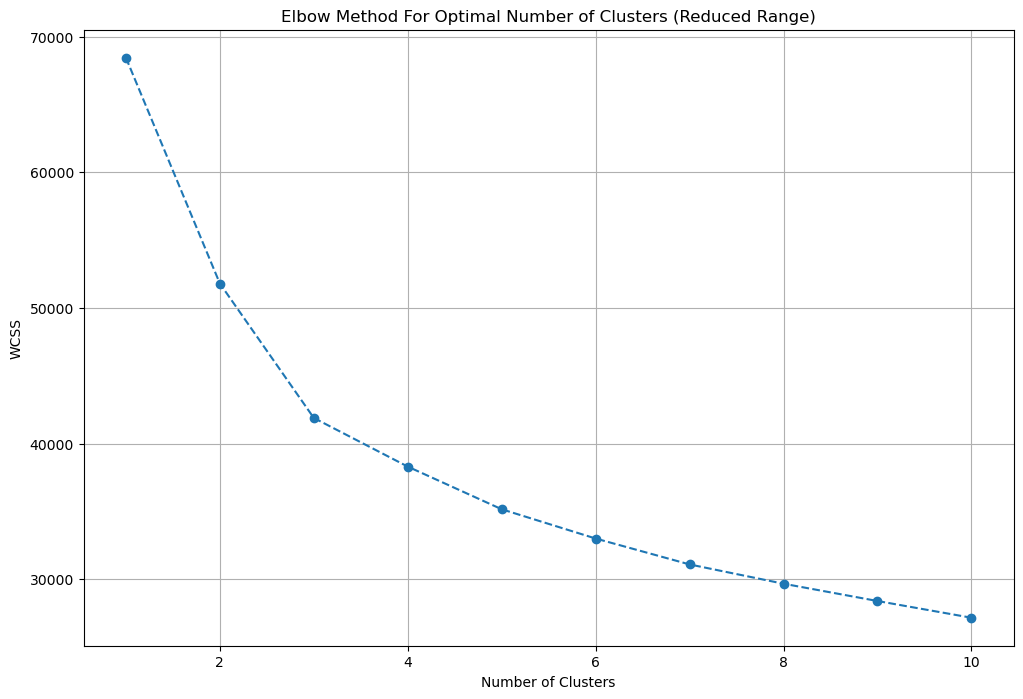

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
654,"['3 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '3 Geyser', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",0
3129,NaN,1
2961,"['5 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '1 Microwave', '10 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
2032,"['6 Fan', '1 Exhaust Fan', '3 Geyser', '9 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2471,NaN,1


In [50]:
df[['society','features']].sample(5)##features

,society,features
1113,supertech araville,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
220,vatika gurgaon,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
867,shri ram apartments,['Lift(s)']
868,independent,NaN
2545,independent,NaN


In [52]:
import pandas as pd
app_df = pd.read_excel('real_estate_data.xlsx')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [53]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [54]:
temp_df = df[df['features'].isnull()]

In [55]:
temp_df.shape

(635, 29)

In [56]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [57]:
df.loc[temp_df.index,'features'] = x.values

In [58]:
df['features'].isnull().sum()

481

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [60]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [61]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2845,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
features_binary_df.shape

(3803, 130)

In [63]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

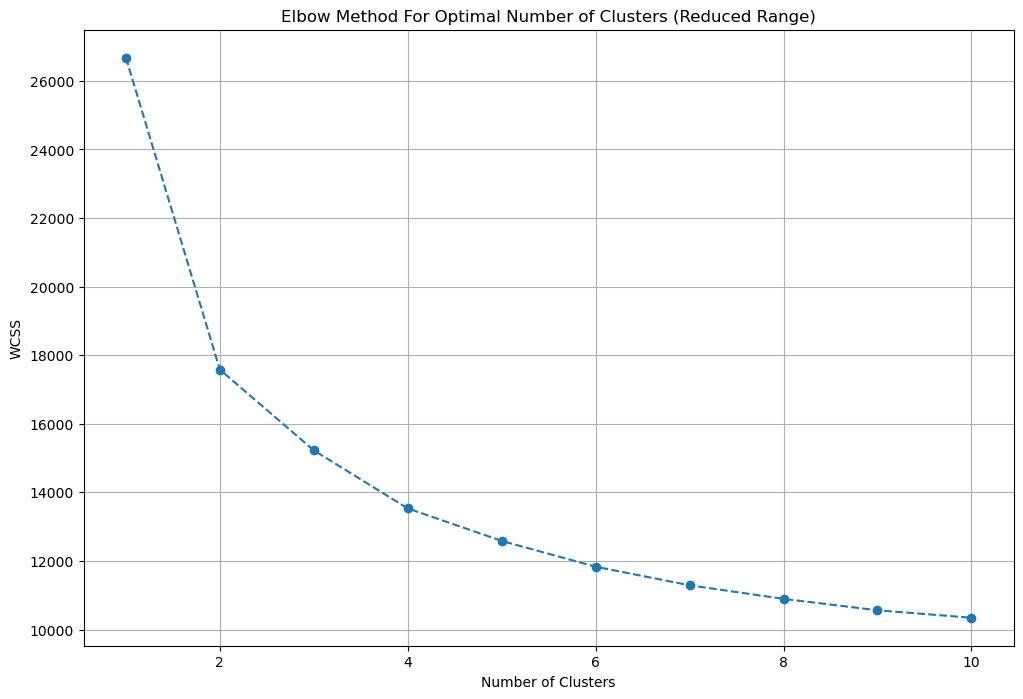

In [64]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [65]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [66]:
df['luxury_score'] = luxury_score

In [67]:
df.head()

,property_type,society,sector,price,Price_Per_Sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,price_per_sqft,noOfFloor,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent house sector 45,sector 40,9.00,NaN,2367.0,Plot area 2367(219.9 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),12,12,3,servant room,NaN,North-West,New Property,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['3 Wardrobe', '8 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",38022.0,4.0,E69310182,NaN,9000.0,6000.0,0,1,0,0,0,0,"[Security / Fire Alarm, Private Garden / Terrace, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal]",71
1,flat,m3m heights,sector 65,1.90,15000.0,1267.0,Super Built up area 1261(117.15 sq.m.),2,2,3,not available,4.0,NaN,Under Construction,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",NaN,NaN,NaN,1261.0,NaN,NaN,0,0,0,0,0,1,"[Power Back-up, Intercom Facility, Lift(s), Swimming Pool, Park, Visitor Parking, Natural Light, Airy Rooms, Fitness Centre / GYM, Club house / Community Center, Water softening plant]",54
2,flat,dlf the ultima,sector 81,2.50,11726.0,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),3,3,2,servant room,20.0,West,Relatively New,"['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['1 Fridge', '7 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '10 Light', '1 Curtains', '3 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed'

In [68]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [69]:
df.shape

(3803, 26)

In [70]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)